### Creating Smaller Dataset for ML

In this notebook, I will:

1. Create smaller dataset for a machine learning model
2. Create rolling variables of four quarters of the features that represent flow data in the data set such as revenues, net income, earnings and cash flow
3. Creating percentage change variables for the features to analyze the relationships between the features and the target variable
4. Create lag variables of the features to analyze auto-correlations with the target variable
5. Create a target variable that is the stock price of the next quarter
6. Visualize the data to understand the relationships between the features and the target variable
7. Save the data set for the machine learning model

In [40]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Load the data

filepath_finance_data = '../Data/Datasets/updated_finance_data.csv'
finance_data = pd.read_csv(filepath_finance_data)


In [ ]:
# Checking the data
# ordering all columns in alphabetical order

finance_data = finance_data.reindex(sorted(finance_data.columns), axis=1)

# for easier viewing, I will make sure all float values are rounded to 2 decimal places and have commas

pd.options.display.float_format = '{:,.2f}'.format

# sorting the finance data by symbol (ascending) and date_x (ascending)

finance_data = finance_data.sort_values(by=['symbol', 'date_x'], ascending=[True, True])

# removing countries that create noise in the data

country2remove = ['IN', 'JP', 'CN', 'BR', 'TW', 'DK'] # removed as it looks like, some data was not accurate for these countries

finance_data = finance_data[~finance_data['country'].isin(country2remove)]

# viewing the first 10 rows of the data

finance_data.head(10)

In [49]:
# create a dataframe with all cmpany names, symbols and sectors

company_data = finance_data[['companyName', 'symbol', 'sector']].drop_duplicates()

company_data

,companyName,symbol,sector
39,Apple Inc.,AAPL,Technology
79,AbbVie Inc.,ABBV,Healthcare
100,"Airbnb, Inc.",ABNB,Consumer Cyclical
140,Abbott Laboratories,ABT,Healthcare
180,Accenture plc,ACN,Technology
...,...,...,...
10795,"Waste Management, Inc.",WM,Industrials
10835,"The Williams Companies, Inc.",WMB,Energy
10875,Walmart Inc.,WMT,Consumer Defensive
10915,Exxon Mobil Corporation,XOM,Energy


In [43]:
# creating a smaller dataset for the machine learning model. First by defining the columns to keep and second by making a copy of the data and filtering for the columns to keep.

kpi2keep = [ 'sector', 'companyName', 'symbol', 'date_x', 'fiscalDateEnding',
            'revenuePerShare', 'capexPerShare', 'operatingCashFlowPerShare_x', 'epsEstimated',
            'grossProfitMargin', 'returnOnEquity', 'freeCashFlowPerShare_x',
            'bookValuePerShare', 'cashPerShare_x', 'stockPrice', 'peRatio', 'debtToEquity', 'currentRatio_x', 'incomeQuality']

# creating a copy of the data and filtering for the columns to keep

finance_data_ml = finance_data[kpi2keep].copy()

# viewing the first 10 rows of the data

finance_data_ml.head(10)


,sector,companyName,symbol,date_x,fiscalDateEnding,revenuePerShare,capexPerShare,operatingCashFlowPerShare_x,epsEstimated,grossProfitMargin,returnOnEquity,freeCashFlowPerShare_x,bookValuePerShare,cashPerShare_x,stockPrice,peRatio,debtToEquity,currentRatio_x,incomeQuality
39,Technology,Apple Inc.,AAPL,2014-12-27,2014-12-27,3.19,0.14,1.44,0.65,0.40,0.15,1.30,5.28,1.39,28.50,9.24,0.30,1.13,1.87
38,Technology,Apple Inc.,AAPL,2015-03-28,2015-03-28,2.50,0.11,0.82,0.54,0.41,0.11,0.72,5.57,1.43,30.81,13.16,0.34,1.16,1.41
37,Technology,Apple Inc.,AAPL,2015-06-27,2015-06-27,2.16,0.09,0.65,0.45,0.40,0.08,0.56,5.48,1.51,31.69,17.01,0.43,1.09,1.40
36,Technology,Apple Inc.,AAPL,2015-09-26,2015-09-26,2.28,0.16,0.60,0.47,0.40,0.09,0.43,5.28,1.84,28.68,14.56,0.54,1.11,1.21
35,Technology,Apple Inc.,AAPL,2015-12-26,2015-12-26,3.41,0.18,1.24,0.81,0.40,0.14,1.05,5.77,1.71,27.01,8.18,0.49,1.00,1.50
34,Technology,Apple Inc.,AAPL,2016-03-26,2016-03-26,2.29,0.12,0.53,0.50,0.39,0.08,0.41,5.91,2.51,26.42,13.85,0.61,1.28,1.10
33,Technology,Apple Inc.,AAPL,2016-06-25,2016-06-25,1.95,0.13,0.49,0.35,0.38,0.06,0.35,5.81,2.84,23.35,16.30,0.67,1.31,1.36
32,Technology,Apple Inc.,AAPL,2016-09-24,2016-09-24,2.18,0.19,0.75,0.41,0.38,0.07,0.56,5.97,3.13,28.18,16.78,0.68,1.35,1.79
31,Technology,Apple Inc.,AAPL,2016-12-31,2016-12-31,3.70,0.16,1.28,0.80,0.39,0.14,1.12,6.25,2.85,28.96,8.58,0.66,1.23,1.52
30,Technology,Apple Inc.,AAPL,2017-04-01,2017-04-01,2.53,0.14,0.60,0.50,0.39,0.08,0.46,6.41,3.21,35.92,17.02,0.73,1.39,1.14


In [44]:
# for the features that represent flow data in the data set such as revenues, net income, earnings and cash flow, I will create rolling variables of 4 quarters (summing 4 quarters together)

# creating a list of the features that represent flow data in the data set

flow_features = ['revenuePerShare', 'capexPerShare', 'operatingCashFlowPerShare_x', 'epsEstimated', 'freeCashFlowPerShare_x']

# creating rolling variables of 4 quarters for the features that represent flow data in the data set

for feature in flow_features:
    finance_data_ml[feature + '_4Q'] = finance_data_ml.groupby('symbol')[feature].rolling(4).sum().reset_index(0, drop=True)

# for features that represent data as of a specific date, I will create rolling variables of 4 quarters (averaging 4 quarters together)

# creating a list of the features that represent data as of a specific date in the data set

date_features = ['grossProfitMargin', 'returnOnEquity', 'bookValuePerShare', 'cashPerShare_x', 'stockPrice', 'peRatio', 'debtToEquity', 'currentRatio_x', 'incomeQuality']

# creating rolling variables of 4 quarters for the features that represent data as of a specific date in the data set

for feature in date_features:
    finance_data_ml[feature + '_4Q'] = finance_data_ml.groupby('symbol')[feature].rolling(4).mean().reset_index(0, drop=True)


# creating a percentage change variable for the features to analyze the relationships between the features and the target variable. They will be calculated across all numerical columns.

# creating a list of the numerical columns in the data set

numerical_columns = finance_data_ml.select_dtypes(include=[np.number]).columns.tolist()

# creating percentage change variables for the features with numerical values in the data set. The percentage change is calculated from the date of the data to the previous quarter. The data is already sorted by symbol and date_x in ascending order.

for column in numerical_columns:
    finance_data_ml[column + '_pct_change'] = finance_data_ml.groupby('symbol')[column].pct_change(fill_method=None)

# creating new columns to split out the date_x column into 3 columns: year, quarter and one column which combines year and quarter

# creating a new column for year

finance_data_ml['year'] = pd.DatetimeIndex(finance_data_ml['date_x']).year

# creating a new column for quarter

finance_data_ml['quarter'] = pd.DatetimeIndex(finance_data_ml['date_x']).quarter

# creating a new column for year and quarter

finance_data_ml['year_quarter'] = finance_data_ml['year'].astype(str) + 'Q' + finance_data_ml['quarter'].astype(str)


# viewing the first 10 rows of the data

finance_data_ml.head(40)


,sector,companyName,symbol,date_x,fiscalDateEnding,revenuePerShare,capexPerShare,operatingCashFlowPerShare_x,epsEstimated,grossProfitMargin,...,bookValuePerShare_4Q_pct_change,cashPerShare_x_4Q_pct_change,stockPrice_4Q_pct_change,peRatio_4Q_pct_change,debtToEquity_4Q_pct_change,currentRatio_x_4Q_pct_change,incomeQuality_4Q_pct_change,year,quarter,year_quarter
39,Technology,Apple Inc.,AAPL,2014-12-27,2014-12-27,3.19,0.14,1.44,0.65,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,4,2014Q4
38,Technology,Apple Inc.,AAPL,2015-03-28,2015-03-28,2.50,0.11,0.82,0.54,0.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,2015Q1
37,Technology,Apple Inc.,AAPL,2015-06-27,2015-06-27,2.16,0.09,0.65,0.45,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2,2015Q2
36,Technology,Apple Inc.,AAPL,2015-09-26,2015-09-26,2.28,0.16,0.60,0.47,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,3,2015Q3
35,Technology,Apple Inc.,AAPL,2015-12-26,2015-12-26,3.41,0.18,1.24,0.81,0.40,...,0.02,0.05,-0.01,-0.02,0.12,-0.03,-0.06,2015,4,2015Q4
34,Technology,Apple Inc.,AAPL,2016-03-26,2016-03-26,2.29,0.12,0.53,0.50,0.39,...,0.02,0.17,-0.04,0.01,0.15,0.03,-0.05,2016,1,2016Q1
33,Technology,Apple Inc.,AAPL,2016-06-25,2016-06-25,1.95,0.13,0.49,0.35,0.38,...,0.01,0.17,-0.07,-0.01,0.11,0.05,-0.01,2016,2,2016Q2
32,Technology,Apple Inc.,AAPL,2016-09-24,2016-09-24,2.18,0.19,0.75,0.41,0.38,...,0.03,0.14,-0.00,0.04,0.06,0.05,0.11,2016,3,2016Q3
31,Technology,Apple Inc.,AAPL,2016-12-31,2016-12-31,3.70,0.16,1.28,0.80,0.39,...,0.02,0.11,0.02,0.01,0.07,0.05,0.00,2016,4,2016Q4
30,Technology,Apple Inc.,AAPL,2017-04-01,2017-04-01,2.53,0.14,0.60,0.50,0.39,...,0.02,0.06,0.09,0.06,0.05,0.02,0.01,2017,2,2017Q2


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def inspect_data(data, company_symbol, start_date, var1, var2, var3, palette='deep'):
    # Unpack variables and graph types
    var1_name, var1_type = var1
    var2_name, var2_type = var2
    var3_name, var3_type = var3

    # Filter the dataset
    filtered_data = data[(data['symbol'] == company_symbol) & (data['date_x'] >= start_date)]
    company_name = filtered_data['companyName'].iloc[0]

    # Create the 3x1 facet grid
    fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
    fig.suptitle(f'Visual Inspection: {company_name}', fontsize=16)

    # Plot the first variable
    if var1_type == 'line':
        sns.lineplot(data=filtered_data, x='date_x', y=var1_name, ax=axes[0])
    elif var1_type == 'bar':
        sns.barplot(data=filtered_data, x='date_x', y=var1_name, ax=axes[0])
    elif var1_type == 'scatter':
        sns.scatterplot(data=filtered_data, x='date_x', y=var1_name, ax=axes[0])
    axes[0].set_title(var1_name)

    # Plot the second variable
    if var2_type == 'line':
        sns.lineplot(data=filtered_data, x='date_x', y=var2_name, ax=axes[1])
    elif var2_type == 'bar':
        sns.barplot(data=filtered_data, x='date_x', y=var2_name, ax=axes[1])
    elif var2_type == 'scatter':
        sns.scatterplot(data=filtered_data, x='date_x', y=var2_name, ax=axes[1])
    axes[1].set_title(var2_name)

    # Plot the third variable
    if var3_type == 'line':
        sns.lineplot(data=filtered_data, x='date_x', y=var3_name, ax=axes[2])
    elif var3_type == 'bar':
        sns.barplot(data=filtered_data, x='date_x', y=var3_name, ax=axes[2])
    elif var3_type == 'scatter':
        sns.scatterplot(data=filtered_data, x='date_x', y=var3_name, ax=axes[2])
    axes[2].set_title(var3_name)

    # Set the x-axis label
    axes[2].set_xlabel('date_x')

    # Rotate x-axis labels by 45 degrees
    for ax in axes:
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

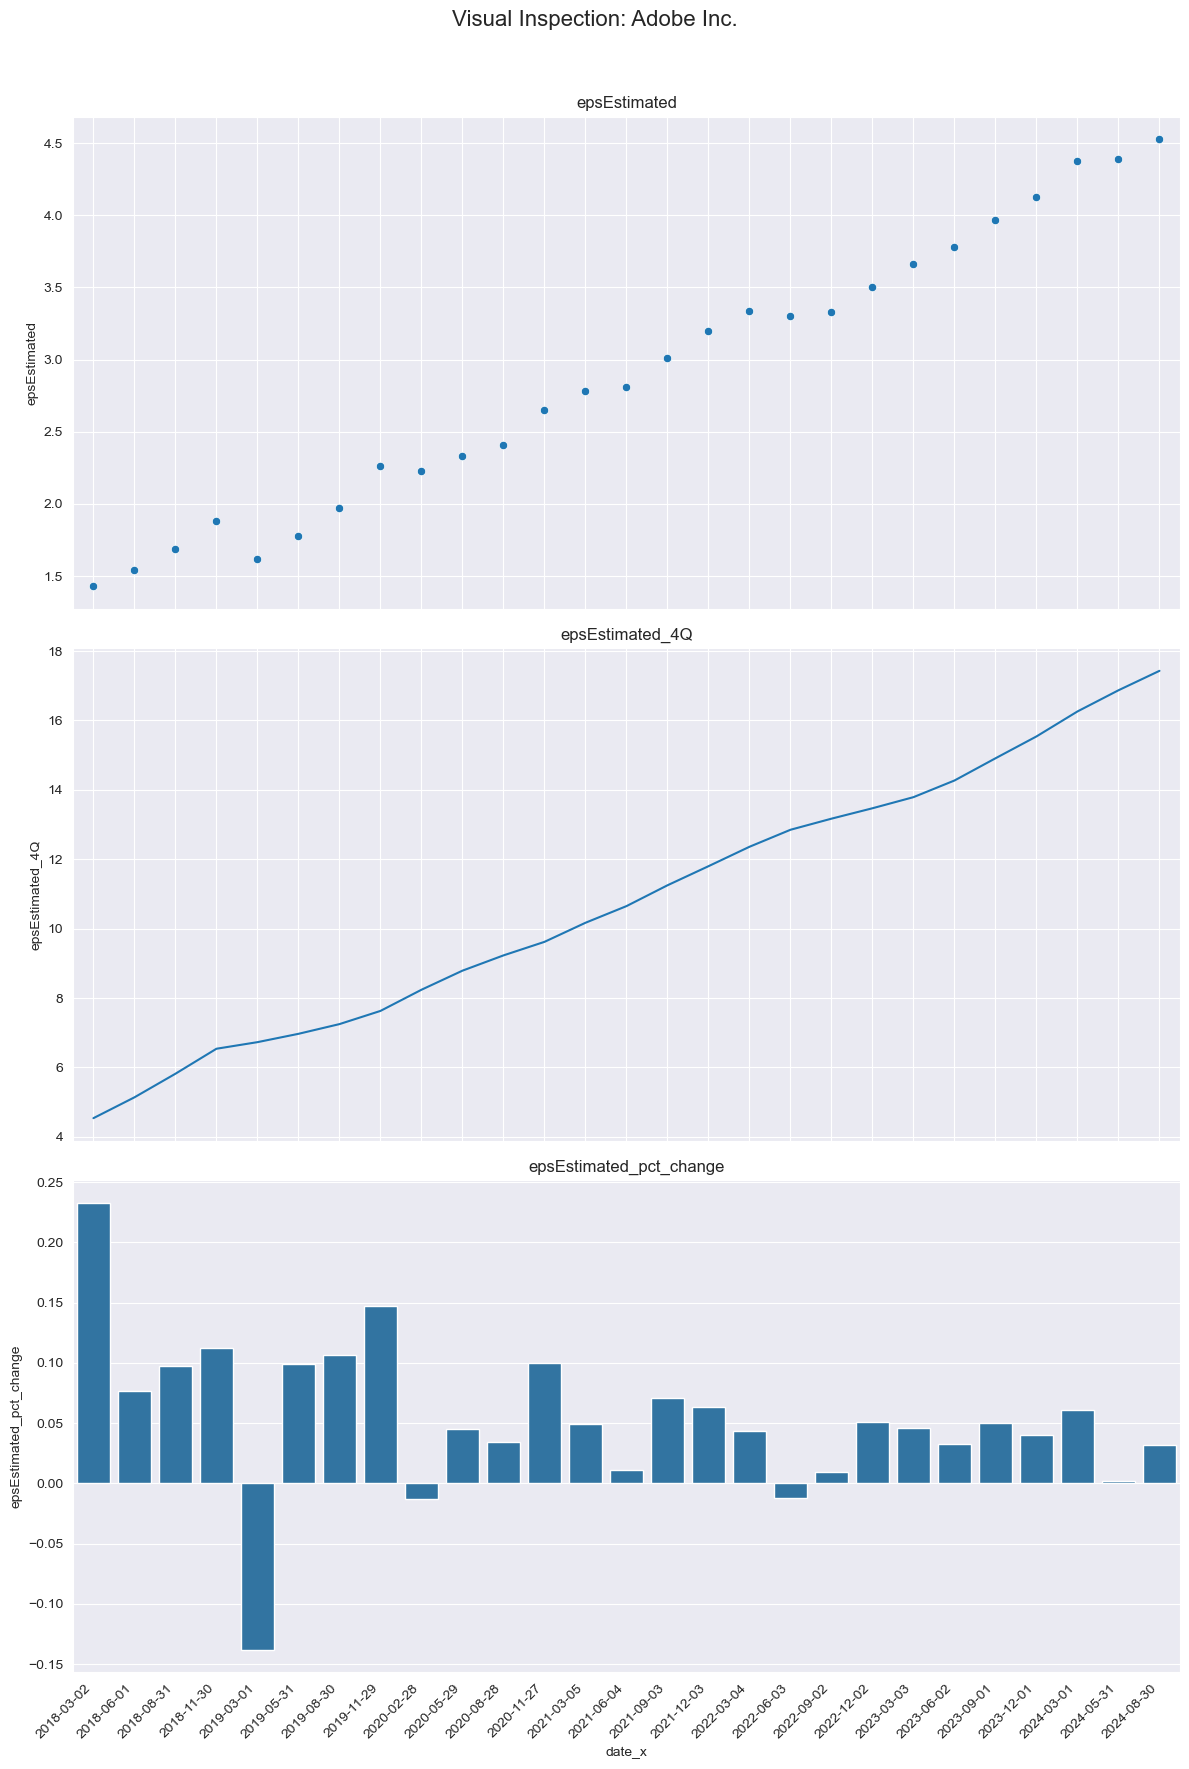

In [51]:
# Example usage of the inspect_data function

# Define the dataset
data = finance_data_ml

# Define the company symbol
company_symbol = 'ADBE'

# Define the starting date
start_date = '2018-01-01'

# Define the variables and graph types
var1 = ('epsEstimated', 'scatter')
var2 = ('epsEstimated_4Q', 'line')
var3 = ('epsEstimated_pct_change', 'bar')

# Define the palette
palette = 'coolwarm'

# Call the function
inspect_data(data, company_symbol, start_date, var1, var2, var3, palette)

In [47]:
# sanity checking the data. Variables and symbols to be defined. I will return the dataframe filter according to the input

var2check= ['stockPrice', 'stockPrice_4Q', 'stockPrice_pct_change', 'date_x', 'symbol']

sym2check = ['AAPL']

def sanity_check(data, var2check, sym2check): #function to return data above for all dates with the symbol and variables defined
    return data[(data['symbol'].isin(sym2check))][var2check]

sanity_check(finance_data_ml, var2check, sym2check)

,stockPrice,stockPrice_4Q,stockPrice_pct_change,date_x,symbol
39,28.50,NaN,NaN,2014-12-27,AAPL
38,30.81,NaN,0.08,2015-03-28,AAPL
37,31.69,NaN,0.03,2015-06-27,AAPL
36,28.68,29.92,-0.09,2015-09-26,AAPL
35,27.01,29.55,-0.06,2015-12-26,AAPL
34,26.42,28.45,-0.02,2016-03-26,AAPL
33,23.35,26.37,-0.12,2016-06-25,AAPL
32,28.18,26.24,0.21,2016-09-24,AAPL
31,28.96,26.73,0.03,2016-12-31,AAPL
30,35.92,29.10,0.24,2017-04-01,AAPL
